In [2]:
import math
import matplotlib.pyplot as plt

In [26]:
N = 20
a = -1
b = 0.5
w_0 = 0

In [27]:
def func(t): # vv
    return math.cos(t)**2 - 0.05

In [5]:
def error(b_i): # vv
    ar1 = [math.pow(abs(b), 2) for b in b_i]
    s = sum(ar1)
    e = math.sqrt(s)
    return e

In [7]:
def okno(w_arr, points_arr, t_n, n):
    _x_n = sum([w * func(t) for w, t in zip(w_arr[1:], points_arr)]) + w_arr[0]
    x_n = func(t_n)
    # локальная ошибка прогноза
    b_n = x_n - _x_n
    w_arr = [w_arr[0]] + [w + (n * b_n * func(t)) for w, t in zip(w_arr[1:], points_arr)]
    return w_arr, b_n, _x_n

In [31]:
def obychenie(M, n, p):
    w_arr = [0 for x in range(p + 1)]
    # математическое ожидание
    w_arr[0] = 0.05
    # вычислим шаг
    shag = (b - a) * 1.0 / (N - 1)
    start_i = 0
    start_x = a
    errors_array = []
    epoxa_num = 1
    err_result = []
    e = 0
    while epoxa_num < M:
        end_x = start_x + (p - 1) * shag
        end_i = start_i + p - 1
        if end_x > b:
            start_i = 0
            start_x = a
            e = error(errors_array)
            err_result.append(e)
            # print(epoxa_num, e,errors_array)
            errors_array = []
            end_x = start_x + (p - 1) * shag
            end_i = start_i + p - 1
            epoxa_num += 1
        points_arr = [a + (t * shag) for t in range(start_i, end_i + 1)]
        w_arr, err, _x_n = okno(w_arr, points_arr, end_x + shag, n)
        errors_array.append(err)
        start_i += 1
        start_x += shag
#         print('W:',w_arr)
        # print('E:', e)    # plt.plot(err_result)
    return w_arr, err_result[-1]

In [9]:
def predpologenie(w_arr, p):
    shag = (b - a) * 1.0 / (N - 1)
    a1 = b - ((p - 1) * shag)
    start_i = 0
    x_arr = []
    right_x_arr = [func(b + x * shag) for x in range(1, N)]
    points_arr = [b - x * shag for x in range(p)][::-1] + [b + shag * x for x in range(1, N)]
    x_res = [func(t) for t in points_arr[:p]]
    b_arr = []
    for i in range(p, N + p):
        _x_n = sum([w * x for w, x in zip(w_arr[1:], x_res[i - p:i])]) + w_arr[0]
        x_n = func(b + shag * (i - p + 1))
        b_i = x_n - _x_n
        b_arr.append(b_i)
        # print(_x_n)        
        x_res.append(_x_n)
        return x_res[p - 1:], right_x_arr, b_arr

Right: 19
Wrong: 2 [0.7201511529340698, 0.6477333010057792]


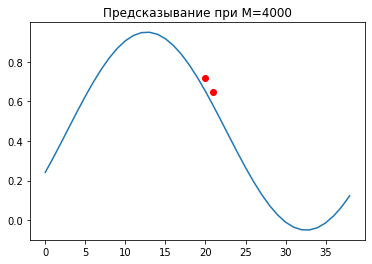

In [46]:
M = 2000
n = 0.6
p = 5

w_arr, e = obychenie(M, n, p)

# -----
new_x_arr, right_x_arr, b_arr = predpologenie(w_arr, p)
shag = (b - a) * 1.0 / (N - 1)
old_x_arr = [func(a + x * shag) for x in range(N)]
plt.plot(old_x_arr + right_x_arr)
print('Right:', len(right_x_arr))
print('Wrong:', len(new_x_arr), new_x_arr)
plt.plot([x + len(old_x_arr) for x in range(len(new_x_arr))], new_x_arr, 'ro')
plt.title('Предсказывание при M=4000')
plt.show()